<a href="https://colab.research.google.com/github/vivekkchandra/CE888Assignment/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import collections
import random

In [0]:
data63B= pd.read_csv("/content/drive/My Drive/Colab Notebooks/DSdatasets/breast_cancer63B.csv") 
print('B', round(data63B['diagnosis'].value_counts()[0]/len(data63B) * 100,2), '% of the dataset')
print('M', round(data63B['diagnosis'].value_counts()[1]/len(data63B) * 100,2), '% of the dataset') 
X1 = data63B.drop(['diagnosis'], axis=1)
y1 = data63B['diagnosis']


B 62.74 % of the dataset
M 37.26 % of the dataset


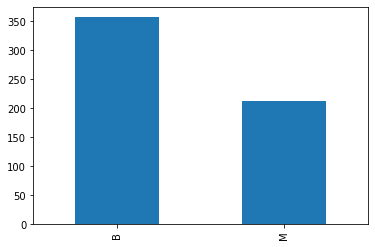

In [0]:
data63B["diagnosis"].value_counts().head(10).plot(kind="bar")

In [0]:
data80B= pd.read_csv("/content/drive/My Drive/Colab Notebooks/DSdatasets/insurance80.csv") 
print('smoker', round(data80B['smoker'].value_counts()[0]/len(data80B) * 100,2), '% of the dataset')
print('Non smoker', round(data80B['smoker'].value_counts()[1]/len(data80B) * 100,2), '% of the dataset') 
X2 = data80B.drop(['smoker'], axis=1)
y2 = data80B['smoker']

smoker 79.52 % of the dataset
Non smoker 20.48 % of the dataset


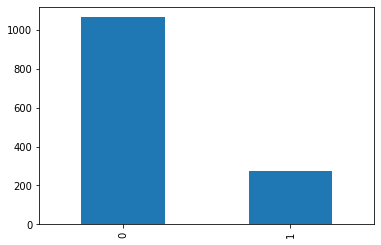

In [0]:
data80B["smoker"].value_counts().head(10).plot(kind="bar")

In [0]:
data90B= pd.read_csv("/content/drive/My Drive/Colab Notebooks/DSdatasets/creditcard90.csv") 
print('0', round(data90B['Class'].value_counts()[0]/len(data90B) * 100,2), '% of the dataset')
print('1', round(data90B['Class'].value_counts()[1]/len(data90B) * 100,2), '% of the dataset') 
X3 = data90B.drop(['Class'], axis=1)
y3 = data90B['Class']

0 99.83 % of the dataset
1 0.17 % of the dataset


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


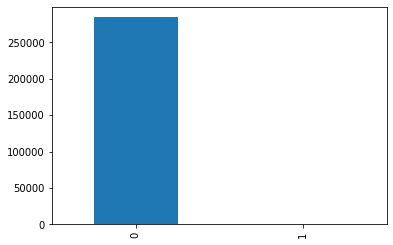

In [23]:
a=data90B[(data90B['Class'] != '0') | (np.random.rand(len(data90B)) < 9)]
a
a["Class"].value_counts().head(10).plot(kind="bar")

In [39]:
class_count = collections.Counter(data90B['Class'])
print(class_count)
print("Imbalance:",(class_count[0]/(class_count[0]+class_count[1]))*100,"%")
#downsampling data90B 0class
indexName= data90B[(data90B['Class'] == 0)].index
eliminationpercentage= 0.98
eliminate= int(class_count[0] * eliminationpercentage)
indicesToRemove = random.sample(indexName.tolist(), eliminate)
data90B= data90B.drop(indicesToRemove)
class_count= collections.Counter(data90B['Class'])
print("\n Post downsampling percentage:", (class_count[0]/(class_count[0]+class_count[1]))*100, "%")
print(class_count)

Counter({0: 284315, 1: 492})
Imbalance: 99.82725143693798 %

 Post downsampling percentage: 92.03754652856449 %
Counter({0: 5687, 1: 492})


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


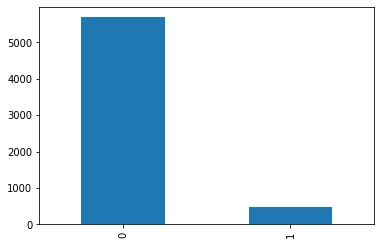

In [40]:
ab=data90B[(data90B['Class'] != '0') | (np.random.rand(len(data90B)) < 9)]
ab
ab["Class"].value_counts().head(10).plot(kind="bar")